In [1]:
import requests

In [2]:
url =' https://prsindia.org/covid-19/cases'
result = requests.get(url)

In [3]:
result.text

'<!DOCTYPE html>\n<html lang="en-US" style="overflow-y: scroll;">\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Number of Cases</title>\n<meta name="article:tag" content="COVID-19">\n<meta name="article:tag" content="Coronavirus disease (COVID-19) pandemic Cases in india">\n<meta name="article:tag" content="covid 19 Cases in india">\n<meta name="article:tag" content="covid 19 Cases states wise in india">\n<meta name="article:tag" content="covid 19 Cases states wise in india">\n<meta name="generator" content="PRS Legislative Research (www.prsindia.org)">\n<meta name="keywords" content="COVID-19, covid 19 Cases in india, Coronavirus disease (COVID-19) pandemic Cases in india, covid 19 Cases states wise in india, covid 19 Cases states wise in india">\n<meta name="twitter:site" content="PRS Legislative Research">\n<meta name="twitter:title" content="Number of Cases">\n<met

In [4]:
import bs4

In [5]:
soup = bs4.BeautifulSoup(result.text, 'lxml')

In [19]:
cases = soup.find('table', class_ = 'table table-striped table-bordered')

In [20]:
cases

<table class="table table-striped table-bordered"><thead>
<tr><th>#</th><th>State/UT</th><th style="width: 11%; text-align:right">Confirmed Cases</th><th style="width: 9%; text-align:right">Active Cases</th><th style="width: 2%; text-align:right">Cured/Discharged</th><th style="width: 5%; text-align:right">Death</th></tr>
</thead>
<tfoot>
<tr><td> </td><td>India</td><td>43452164</td><td>104555</td><td>42822493</td><td>525116</td></tr>
</tfoot>
<tbody>
<tr data-key="29717"><td style="width: 5%;">1</td><td style="width: 20%;">Andaman and Nicobar Islands</td><td style="width: 11%; text-align:right">10157</td><td style="width: 9%; text-align:right">42</td><td style="width: 2%; text-align:right">9986</td><td style="width: 5%; text-align:right">129</td></tr>
<tr data-key="29718"><td style="width: 5%;">2</td><td style="width: 20%;">Andhra Pradesh</td><td style="width: 11%; text-align:right">2321379</td><td style="width: 9%; text-align:right">755</td><td style="width: 2%; text-align:right">230

In [22]:
headers = []
for i in cases.find_all('th'):
 title = i.text
 headers.append(title)

In [23]:
headers

['#',
 'State/UT',
 'Confirmed Cases',
 'Active Cases',
 'Cured/Discharged',
 'Death']

In [1]:
import pandas as pd

In [25]:
mydata = pd.DataFrame(columns = headers)

In [27]:
for j in cases.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row

In [28]:
mydata

,#,State/UT,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,,India,43452164,104555,42822493,525116
1,1,Andaman and Nicobar Islands,10157,42,9986,129
2,2,Andhra Pradesh,2321379,755,2305893,14731
3,3,Arunachal Pradesh,64518,4,64218,296
4,4,Assam,724788,395,716405,7988
5,5,Bihar,832581,934,819388,12259
6,6,Chandigarh,93785,568,92052,1165
7,7,Chhattisgarh,1154179,861,1139282,14036
8,8,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
9,9,Delhi,1934009,4325,1903423,26261


In [30]:
mydata.drop('#', inplace=True, axis=1)

In [31]:
mydata

,State/UT,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,India,43452164,104555,42822493,525116
1,Andaman and Nicobar Islands,10157,42,9986,129
2,Andhra Pradesh,2321379,755,2305893,14731
3,Arunachal Pradesh,64518,4,64218,296
4,Assam,724788,395,716405,7988
5,Bihar,832581,934,819388,12259
6,Chandigarh,93785,568,92052,1165
7,Chhattisgarh,1154179,861,1139282,14036
8,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
9,Delhi,1934009,4325,1903423,26261


In [33]:
mydata.to_csv('covid_data_site1.csv', index=False)

In [2]:
df=pd.read_csv('covid_data_site1.csv')
df

,State/UT,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,India,43452164,104555,42822493,525116
1,Andaman and Nicobar Islands,10157,42,9986,129
2,Andhra Pradesh,2321379,755,2305893,14731
3,Arunachal Pradesh,64518,4,64218,296
4,Assam,724788,395,716405,7988
5,Bihar,832581,934,819388,12259
6,Chandigarh,93785,568,92052,1165
7,Chhattisgarh,1154179,861,1139282,14036
8,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
9,Delhi,1934009,4325,1903423,26261


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = df.drop(df.index[0])

In [19]:
data

,State/UT,Confirmed Cases,Active Cases,Cured/Discharged,Death
1,Andaman and Nicobar Islands,10157,42,9986,129
2,Andhra Pradesh,2321379,755,2305893,14731
3,Arunachal Pradesh,64518,4,64218,296
4,Assam,724788,395,716405,7988
5,Bihar,832581,934,819388,12259
6,Chandigarh,93785,568,92052,1165
7,Chhattisgarh,1154179,861,1139282,14036
8,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
9,Delhi,1934009,4325,1903423,26261
10,Goa,248540,982,243720,3838


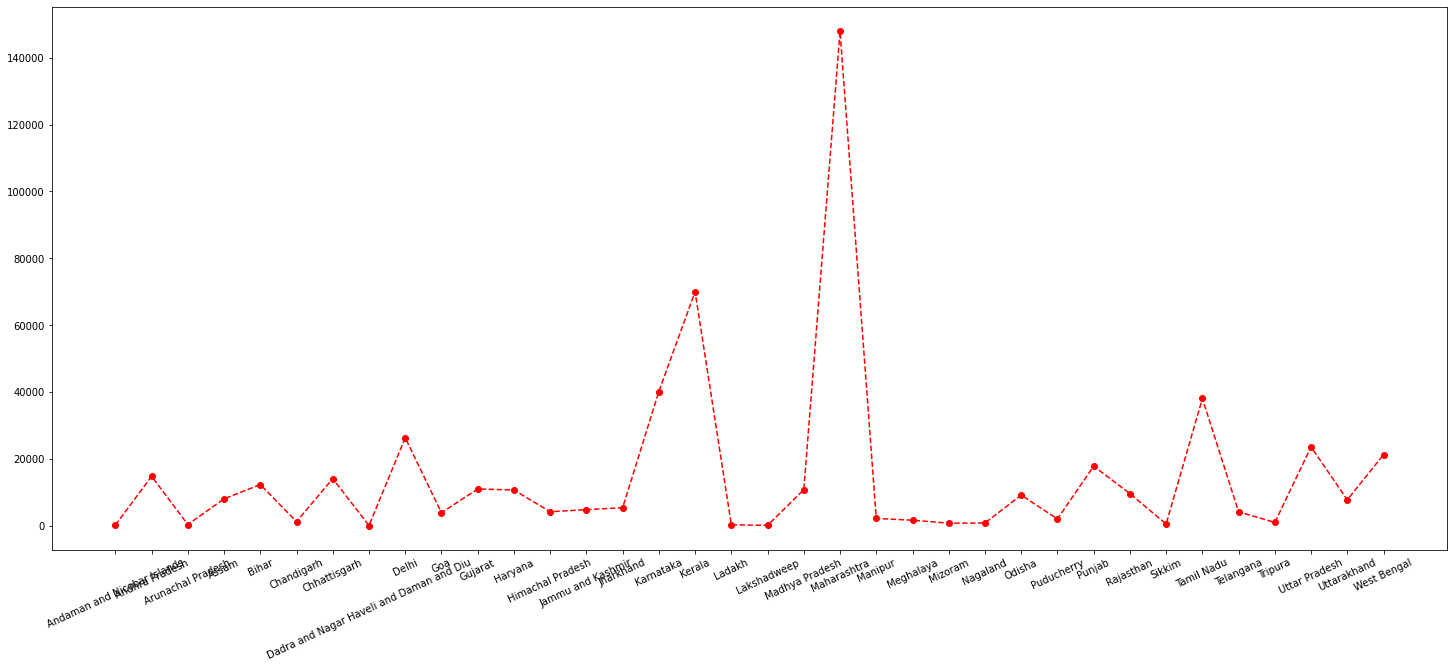

In [35]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 25)
plt.plot(data['State/UT'], data['Death'], color = 'r', linestyle = 'dashed',marker = 'o')
#data.plot(x="State/UT",y="Death")

From above plot we can conclude that the most number of deaths due to covid 19 has occurred in Maharashtra state

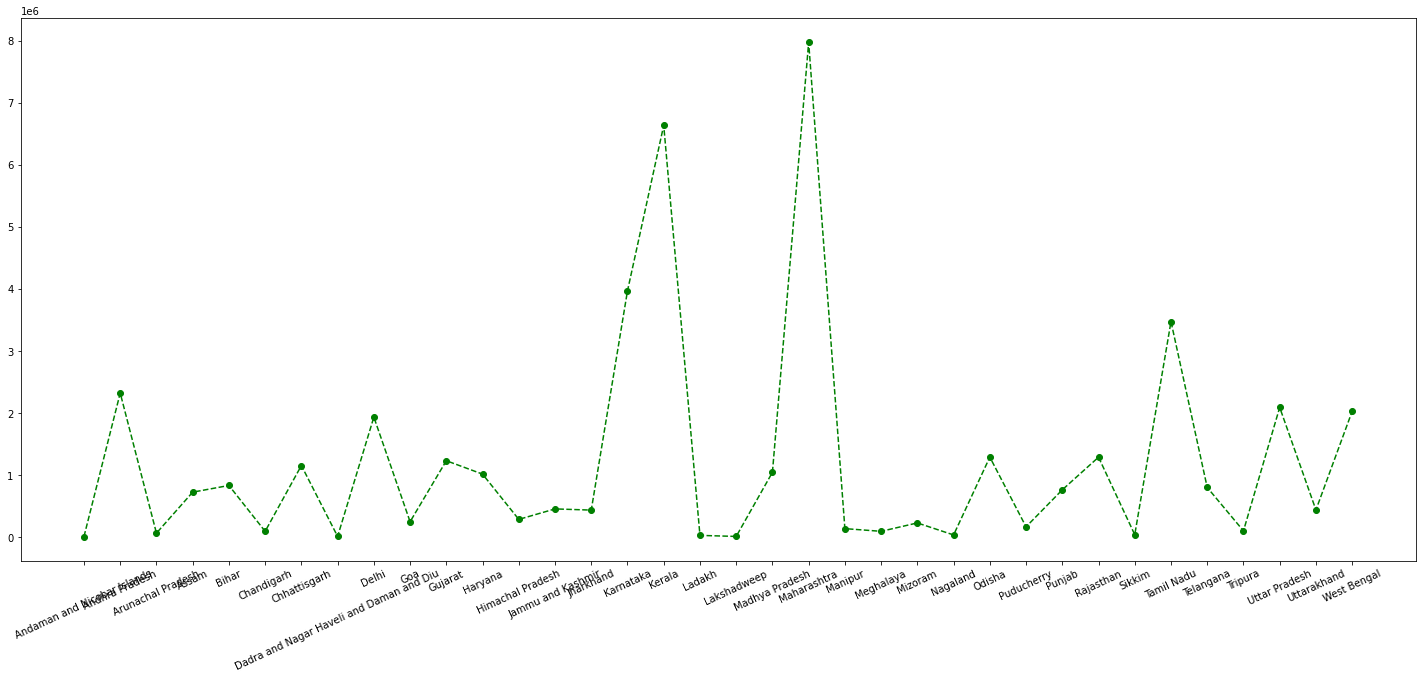

In [34]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 25)
plt.plot(data['State/UT'], data['Confirmed Cases'], color = 'g', linestyle = 'dashed',marker = 'o')
